In [1]:
import os.path
import csv
import numpy as np
import scipy.spatial
import pandas as pd

In [3]:

os.chdir("prepared_corpora/msrp_noun_sym_verb_anto_corruptions/")

In [4]:
!ls


10noun_sym_semantic_corruptions.txt   6verb_anto_semantic_corruptions.txt
10verb_anto_semantic_corruptions.txt  7noun_sym_semantic_corruptions.txt
1noun_sym_semantic_corruptions.txt    7verb_anto_semantic_corruptions.txt
1verb_anto_semantic_corruptions.txt   8noun_sym_semantic_corruptions.txt
2noun_sym_semantic_corruptions.txt    8verb_anto_semantic_corruptions.txt
2verb_anto_semantic_corruptions.txt   9noun_sym_semantic_corruptions.txt
3noun_sym_semantic_corruptions.txt    9verb_anto_semantic_corruptions.txt
3verb_anto_semantic_corruptions.txt   microsoft_ids.txt
4noun_sym_semantic_corruptions.txt    outVectors_RAE2011.csv
4verb_anto_semantic_corruptions.txt   paraphrases.txt
5noun_sym_semantic_corruptions.txt    parsed.txt
5verb_anto_semantic_corruptions.txt   phrases_RAE2011.txt
6noun_sym_semantic_corruptions.txt    phrases.txt


In [5]:
def embedding_distance(embeddings, id1, id2):
    ii = id1 - 1  #Change from 1 indexed id, to 0 indexex embedding index
    jj = id2 - 1
    return scipy.spatial.distance.cosine(embeddings[ii,:], embeddings[jj,:])

In [6]:
def load_link_distances(link_filename, embeddings):
    links = np.loadtxt(link_filename, delimiter=",",skiprows=1, dtype=np.int)
    dists = pd.Series()
    for link in links:
        assert(len(link)==2)
        phrase_id = link[0]
        var_phrase_id = link[1]
        
        dists.loc[phrase_id] = embedding_distance(embeddings, phrase_id, var_phrase_id)
    return dists



In [7]:
def get_dists_table(embedding_filename, max_corruption = 10):
    embeddings = np.loadtxt(embedding_filename, delimiter=",")
    dists = pd.DataFrame()
    dists["paraphrase"] = load_link_distances("paraphrases.txt", embeddings)
    for corruption_level in range(1,max_corruption+1):
        link_filename = str(corruption_level)+"verb_anto_semantic_corruptions.txt"
        dists["verb_anto_" + str(corruption_level)] = load_link_distances(link_filename, embeddings)
        link_filename = str(corruption_level)+"noun_sym_semantic_corruptions.txt"
        dists["noun_sym_" + str(corruption_level)] = load_link_distances(link_filename, embeddings)
    return dists  
    

In [9]:
dists = get_dists_table("outVectors_RAE2011.csv")
dists

/usr/local/lib/python3.4/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "2verb_anto_semantic_corruptions.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/usr/local/lib/python3.4/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "3verb_anto_semantic_corruptions.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/usr/local/lib/python3.4/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "4verb_anto_semantic_corruptions.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/usr/local/lib/python3.4/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "5verb_anto_semantic_corruptions.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/usr/local/lib/python3.4/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "6verb_anto_semantic_corruptions.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


,paraphrase,verb_anto_1,noun_sym_1,verb_anto_2,noun_sym_2,verb_anto_3,noun_sym_3,verb_anto_4,noun_sym_4,verb_anto_5,...,verb_anto_6,noun_sym_6,verb_anto_7,noun_sym_7,verb_anto_8,noun_sym_8,verb_anto_9,noun_sym_9,verb_anto_10,noun_sym_10
1,0.526558,NaN,2.772889e-02,NaN,0.287750,NaN,0.296361,NaN,0.310166,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.526558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.456558,NaN,1.013056e-03,NaN,0.003181,NaN,0.004574,NaN,0.004094,NaN,...,NaN,0.037781,NaN,0.041477,NaN,0.041861,NaN,NaN,NaN,NaN
16,0.456558,NaN,5.361451e-01,NaN,0.541465,NaN,0.550807,NaN,0.557151,NaN,...,NaN,0.570568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,0.938018,NaN,1.905517e-02,NaN,0.017946,NaN,0.021958,NaN,0.021294,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,0.938018,NaN,4.825487e-03,NaN,0.006551,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,0.474586,NaN,4.613935e-04,NaN,0.029300,NaN,0.039957,NaN,0.069113,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,0.474586,NaN,1.699625e-03,NaN,0.481079,NaN,0.495931,NaN,0.493569,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,0.958770,NaN,8.342125e-03,NaN,0.008909,NaN,0.017932,NaN,0.030925,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.958770,NaN,1.953769e-02,NaN,0.038548,NaN,0.201890,NaN,0.234459,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dists[np.logical_not(pd.isnull(dists.verb_anto_1))]

,paraphrase,verb_anto_1,noun_sym_1,verb_anto_2,noun_sym_2,verb_anto_3,noun_sym_3,verb_anto_4,noun_sym_4,verb_anto_5,...,verb_anto_6,noun_sym_6,verb_anto_7,noun_sym_7,verb_anto_8,noun_sym_8,verb_anto_9,noun_sym_9,verb_anto_10,noun_sym_10
14805,0.106921,0.626536,5.785165e-05,NaN,4.622392e-01,NaN,4.912302e-01,NaN,0.491230,NaN,...,NaN,0.484087,NaN,0.620853,NaN,0.620327,NaN,0.620487,NaN,0.625755
17202,0.800905,0.876387,2.215660e-07,NaN,2.943402e-07,NaN,3.065361e-07,NaN,0.000001,NaN,...,NaN,0.881558,NaN,0.877555,NaN,0.880458,NaN,0.872281,NaN,0.874664
17214,0.800905,0.167123,4.853022e-07,NaN,4.257166e-07,NaN,2.625288e-04,NaN,0.090957,NaN,...,NaN,0.165393,NaN,0.166678,NaN,0.166258,NaN,0.165980,NaN,0.166279
19551,0.506292,0.339643,3.040852e-02,NaN,3.018155e-02,NaN,6.664432e-02,NaN,0.165328,NaN,...,NaN,0.188384,NaN,0.188611,NaN,0.321208,NaN,0.333737,NaN,0.334856
34552,0.694366,0.677488,3.169437e-02,NaN,1.828168e-01,NaN,1.831529e-01,NaN,0.183136,NaN,...,NaN,0.679059,NaN,0.653815,NaN,0.650556,NaN,0.649551,NaN,0.652481


In [9]:
for ii in range(1,11):
    portion = (dists.paraphrase < dists[str(ii)]).sum()/dists[str(ii)].count()
    print(ii, "-", portion)
    

1 - 0.0445344129555
2 - 0.0875756496974
3 - 0.125205930807
4 - 0.165272995573
5 - 0.184848484848
6 - 0.211538461538
7 - 0.22972972973
8 - 0.25
9 - 0.25
10 - 0.5


In [198]:
!git commit -a -m=""

[master 2e679ff] =
 3 files changed, 1316 insertions(+), 9056 deletions(-)
 delete mode 100644 prototypes/SemanticVsSyntacticEval/prepared_corpora/msrp/paraphases.txt
 rewrite prototypes/SemanticVsSyntacticEval/results_analysis.ipynb (73%)


In [10]:
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 15, 15

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa778a38c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa75ad53550>]], dtype=object)

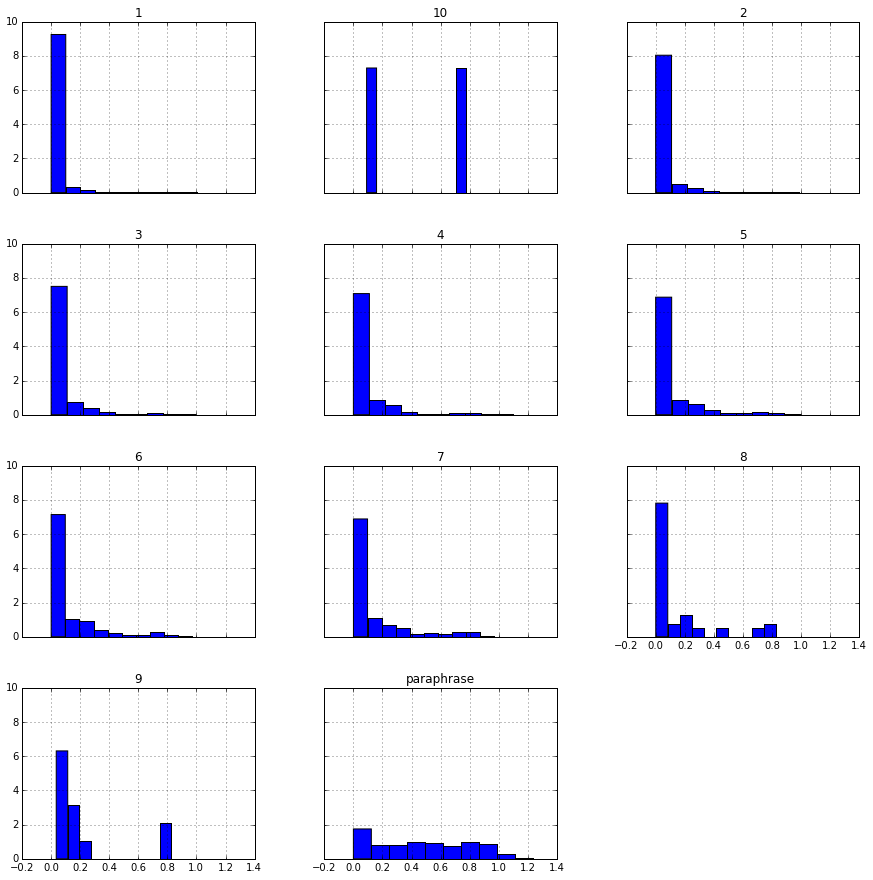

In [11]:
dists.hist(sharex=True, sharey=True, normed=True)